In [1]:
#!/usr/bin/env python

import os
import glob
import subprocess

import tables
import pandas as pd
import matplotlib as mpl
mpl.use("Agg")
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap

import numpy as np

In [2]:
%matplotlib inline

In [3]:
basePath = "/home/enpaudel/icecube/triggerStudy/simFiles/dataSetCleanTest/"

In [20]:
basePathOfficial = "/home/enpaudel/icecube/triggerStudy/simFiles/dataSetCleanOfficial/"

In [21]:
hdf5NullListPOfficial = sorted(glob.glob(basePathOfficial+"2012_12360*.hdf5"))
hdf5NullListHeOfficial = sorted(glob.glob(basePathOfficial+"2012_12630*.hdf5"))
hdf5NullListOOfficial = sorted(glob.glob(basePathOfficial+"2012_12631*.hdf5"))
hdf5NullListFeOfficial = sorted(glob.glob(basePathOfficial+"2012_12362*.hdf5"))
hdf5NullListOfficial = np.concatenate((hdf5NullListPOfficial,hdf5NullListHeOfficial,hdf5NullListOOfficial,hdf5NullListFeOfficial))

In [22]:
len(hdf5NullListOfficial)

120

In [24]:
# hdf5NullListOfficial

In [27]:
pd.read_hdf(hdf5NullListOfficial[0],key="IceTopSTA5_13_filter")

KeyError: 'No object named IceTopSTA5_13_filter in the file'

In [37]:
pd.read_hdf(hdf5NullListOfficial[0],key="MCPrimary")

,Run,Event,SubEvent,SubEventStream,exists,x,y,z,time,zenith,azimuth,energy,speed,length,pdg_encoding,type,shape,location,fit_status
0,2,6,0,0,1,39.491699,27.012478,1953.08,10013.611770,0.216553,0.765261,1.375527e+05,0.299792,12060.206687,2212,2212,10,0,-1
1,2,88,0,0,1,-249.483765,269.715753,1953.08,9996.739448,0.216553,0.765261,1.375527e+05,0.299792,12060.206687,2212,2212,10,0,-1
2,4,8,0,0,1,76.900929,23.952042,1953.08,10353.216088,0.355619,1.739962,2.202315e+05,0.299792,38509.447703,2212,2212,10,0,-1
3,4,29,0,0,1,260.376586,-208.589063,1953.08,10338.327089,0.355619,1.739962,2.202315e+05,0.299792,38509.447703,2212,2212,10,0,-1
4,5,27,0,0,1,-232.829918,-61.683866,1953.08,12198.622067,0.644303,1.370112,2.802748e+05,0.299792,30801.809122,2212,2212,10,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,102,58,0,0,1,-214.578853,235.627868,1953.08,12142.346768,0.637156,4.863698,1.328602e+06,0.299792,12068.118484,2212,2212,10,0,-1
1592,102,67,0,0,1,145.739943,302.451622,1953.08,12187.625646,0.637156,4.863698,1.328602e+06,0.299792,12068.118484,2212,2212,10,0,-1
1593,102,72,0,0,1,-260.544474,-459.004636,1953.08,12029.764141,0.637156,4.863698,1.328602e+06,0.299792,12068.118484,2212,2212,10,0,-1
1594,102,77,0,0,1,-302.501793,-425.597717,1953.08,12098.222181,0.637156,4.863698,1.328602e+06,0.299792,12068.118484,2212,2212,10,0,-1


In [4]:
# hdf5NullList=sorted(glob.glob(basePath+"O*Clean*.hdf5"))
hdf5NullListP = sorted(glob.glob(basePath+"p*Clean*.hdf5"))
hdf5NullListHe = sorted(glob.glob(basePath+"He*Clean*.hdf5"))
hdf5NullListO = sorted(glob.glob(basePath+"O*Clean*.hdf5"))
hdf5NullListFe = sorted(glob.glob(basePath+"Fe*Clean*.hdf5"))
hdf5NullList = np.concatenate((hdf5NullListP,hdf5NullListHe,hdf5NullListO,hdf5NullListFe))

In [8]:
dataT = pd.HDFStore(hdf5NullList[1])

In [9]:
dataT.keys()

[]

In [35]:
dataT2 = pd.HDFStore(hdf5NullList[1])

In [36]:
dataT2.keys()

[]

In [7]:
f = tables.open_file(hdf5NullListOfficial[0])
print(f.root)

/ (RootGroup) ''


In [5]:
plotFolder = "/home/enpaudel/icecube/triggerStudy/plots/"

In [10]:
SMT1Trigger_df = pd.read_hdf(hdf5NullList[0],key="OfflineIceTopHLCVEMPulsesCleanTimeCleanCharge_isSTA1")
SMT3Trigger_df = pd.read_hdf(hdf5NullList[0],key="ITSMTTriggered")

In [17]:
SMT1Trigger_df = pd.read_hdf(hdf5NullList[0],key="OfflineIceTopHLCVEMPulsesCleanTimeCleanCharge_delta_t")

In [19]:
SMT1Trigger_df

,Run,Event,SubEvent,SubEventStream,exists,vector_index,item
0,1,1104,0,0,1,0,14.0
1,1,1109,0,0,1,0,18.0
2,1,1117,0,0,1,0,5.0
3,1,1132,0,0,1,0,32.0
4,1,1144,0,0,1,0,8.0
...,...,...,...,...,...,...,...
14535,108,108199,0,0,1,3,12.0
14536,108,108199,0,0,1,4,13.0
14537,108,108199,0,0,1,5,18.0
14538,108,108199,0,0,1,6,20.0


In [11]:
SMT1Trigger_df.head()

,Run,Event,SubEvent,SubEventStream,exists,value
0,1,1100,0,0,1,0.0
1,1,1101,0,0,1,0.0
2,1,1102,0,0,1,0.0
3,1,1103,0,0,1,0.0
4,1,1104,0,0,1,1.0


In [9]:
SMT3Trigger_df.head()

,Run,Event,SubEvent,SubEventStream,exists,value
0,1,1100,0,0,1,0.0
1,1,1101,0,0,1,0.0
2,1,1102,0,0,1,0.0
3,1,1103,0,0,1,0.0
4,1,1104,0,0,1,0.0


In [10]:
SMT3Trigger_df

,Run,Event,SubEvent,SubEventStream,exists,value
0,1,1100,0,0,1,0.0
1,1,1101,0,0,1,0.0
2,1,1102,0,0,1,0.0
3,1,1103,0,0,1,0.0
4,1,1104,0,0,1,0.0
...,...,...,...,...,...,...
7925,109,109195,0,0,1,1.0
7926,109,109196,0,0,1,0.0
7927,109,109197,0,0,1,1.0
7928,109,109198,0,0,1,1.0


In [11]:
SMT1Trigger_df

,Run,Event,SubEvent,SubEventStream,exists,value
0,1,1100,0,0,1,1.0
1,1,1101,0,0,1,0.0
2,1,1102,0,0,1,1.0
3,1,1103,0,0,1,0.0
4,1,1104,0,0,1,0.0
...,...,...,...,...,...,...
7925,109,109195,0,0,1,1.0
7926,109,109196,0,0,1,1.0
7927,109,109197,0,0,1,1.0
7928,109,109198,0,0,1,1.0


In [6]:
def getTimeCharge(key,hdf5List):
    timeList = np.array([])
    chargeList = np.array([])
    for ihdf in hdf5List:
        time,charge = getTimeCharge_(key,ihdf)
        timeList = np.concatenate((timeList,time))
        chargeList = np.concatenate((chargeList,charge))
    return timeList, chargeList
    

In [7]:
def getTimeCharge_(key,hdfFile):
    '''takes HLC/SLC pulses key and hdf file, returns time and charge
    '''
    dataT = pd.read_hdf(hdfFile,key=key)
    return dataT["time"].values,dataT["charge"].values
    
    

In [8]:
def plotTimeHistogram(time,suffix,key):
    time = np.log10(time)
    fig = plt.figure(figsize=(8,5))
    gs = gridspec.GridSpec(ncols=1,nrows=1)
    ax = fig.add_subplot(gs[0])
    hitBins = np.linspace(min(time),max(time),200)
    ax.hist(time,bins=hitBins,histtype="step",lw=2.5,alpha=1)
    ax.tick_params(axis='both',which='both', direction='in', labelsize=20)
    ax.set_xlabel(r"log10(time [ns])", fontsize=20)
    ax.set_ylabel(r"count", fontsize=20)
    ax.set_yscale('log')
    ax.grid(True,alpha=0.2)
    ax.set_title(key,fontsize=16)
    # ax.legend(fontsize=20)
    plt.savefig(plotFolder+"/"+str(suffix)+".pdf",transparent=False,bbox_inches='tight')
    plt.close()

In [9]:
def plotTimeChargeScatter(time,charge,suffix,key):
    time = np.log10(time)
    charge = np.log10(charge)
    fig = plt.figure(figsize=(8,5))
    gs = gridspec.GridSpec(ncols=1,nrows=1)
    ax = fig.add_subplot(gs[0])
    ax.scatter(time,charge,s=10)
    ax.tick_params(axis='both',which='both', direction='in', labelsize=20)
    ax.set_xlabel(r"log10(time [ns])", fontsize=20)
    ax.set_ylabel(r"log10(charge)", fontsize=20)
#     ax.set_yscale('log')
    ax.set_ylim(-4.5,4.5)
    ax.set_title(key,fontsize=16)
    ax.grid(True,alpha=0.2)
    plt.savefig(plotFolder+"/scatterChargeTime"+str(suffix)+".png",transparent=False,bbox_inches='tight')
    plt.close()

In [10]:
def scatter_hist_(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

In [11]:
def scatter_hist(x,y,suffix):
    fig = plt.figure(figsize=(8, 5))
    gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                          left=0.1, right=0.9, bottom=0.1, top=0.9,
                          wspace=0.05, hspace=0.05)
    ax = fig.add_subplot(gs[1, 0])
    ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    # use the previously defined function
    scatter_hist_(x, y, ax, ax_histx, ax_histy)
    plt.savefig(plotFolder+"/scatterChargeTimeHist"+str(suffix)+".png",transparent=False,bbox_inches='tight')
#     plt.show()
    plt.close()

In [12]:
def plotScatterHist(hdfFileList,key,suffix):
    timeList,chargeList = getTimeCharge(key=key,hdf5List=hdfFileList)
    plotTimeHistogram(timeList,suffix,key)
    plotTimeChargeScatter(timeList,chargeList,suffix,key)
#     scatter_hist(timeList,chargeList,suffix)
#     print("checking length",len(timeList),len(chargeList),len(hdfFileList))

In [13]:
plotScatterHist(hdf5NullList,key="OfflineIceTopSLCVEMPulses",suffix="SLCVEMTime")

In [14]:
plotScatterHist(hdf5NullList,key="OfflineIceTopHLCVEMPulses",suffix="HLCVEMTime")

In [15]:
plotScatterHist(hdf5NullList,key="OfflineIceTopSLCTankPulsesCleanTimeCleanCharge",suffix="SLCVEMTimeCleaned")
    

In [16]:
plotScatterHist(hdf5NullList,key="OfflineIceTopHLCTankPulsesCleanTimeCleanCharge",suffix="HLCVEMTimeCleaned")

In [18]:
dataT = pd.read_hdf(hdf5NullList[1],key="OfflineIceTopSLCTankPulsesCleanTimeCleanChargeHitTimeDuration")

In [19]:
dataT

,Run,Event,SubEvent,SubEventStream,exists,value
0,115,115100,0,0,1,2416.0
1,115,115101,0,0,1,10689.0
2,115,115102,0,0,1,1146.0
3,115,115103,0,0,1,2320.0
4,115,115104,0,0,1,1370.0
...,...,...,...,...,...,...
8015,232,232105,0,0,1,-825543.0
8016,232,232106,0,0,1,-822861.0
8017,232,232107,0,0,1,1846.0
8018,232,232108,0,0,1,187.0


In [20]:
def getTankHitDuration(keyDuration,keyHit,hdf5List):
    hitDurationList = np.array([])
    hitList = np.array([])
    for ihdf in hdf5List:
        ihitDuration,ihit = getTankHitDuration_(keyDuration,keyHit,ihdf)
        hitDurationList = np.concatenate((hitDurationList,ihitDuration))
        hitList = np.concatenate((hitList,ihit))
    return hitDurationList,hitList

In [21]:
def getTankHitDuration_(keyDuration,keyHit,hdfFile):
    '''takes HLC/SLC pulses key and hdf file, returns time and charge
    '''
    dataDuration = pd.read_hdf(hdfFile,key=keyDuration)
    dataHit = pd.read_hdf(hdfFile,key=keyHit)
    return dataDuration["value"].values,dataHit["value"].values

In [22]:
def plotHitDuration(hit,HitDuration,prefix):
    fig = plt.figure(figsize=(8,5))
    gs = gridspec.GridSpec(ncols=1,nrows=1)
    ax = fig.add_subplot(gs[0])
    ax.scatter(hit,HitDuration,s=10)
    ax.tick_params(axis='both',which='both', direction='in', labelsize=20)
    ax.set_xlabel(r"tank hit", fontsize=20)
    ax.set_ylabel(r"hit duration [ns]", fontsize=20)
    ax.set_yscale('log')
    ax.set_ylim(0.1,None)
    ax.grid(True,alpha=0.2)
    plt.savefig(plotFolder+"/scatterHitDuration"+str(prefix)+".png",transparent=False,bbox_inches='tight')
#     plt.close()

In [23]:
slcHitDuration,slcHit = getTankHitDuration(keyDuration="OfflineIceTopSLCTankPulsesHitTimeDuration",keyHit="OfflineIceTopSLCTankPulsesTotalHit",hdf5List=hdf5NullList)

In [24]:
hlcHitDuration,hlcHit = getTankHitDuration(keyDuration="OfflineIceTopHLCTankPulsesHitTimeDuration",keyHit="OfflineIceTopHLCTankPulsesTotalHit",hdf5List=hdf5NullList)

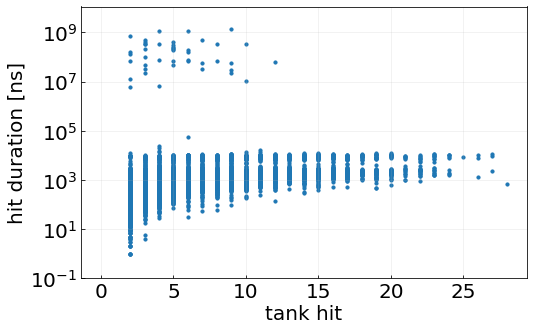

In [25]:
plotHitDuration(slcHit,slcHitDuration,prefix="SLC")

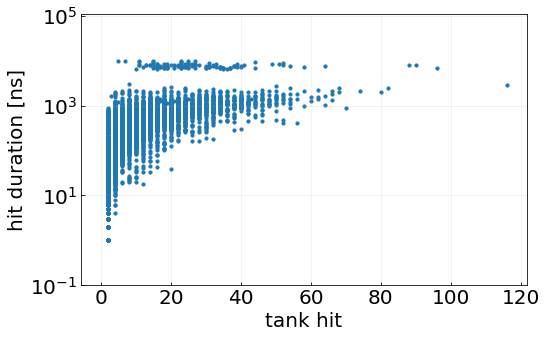

In [26]:
plotHitDuration(hlcHit,hlcHitDuration,prefix="HLC")

In [27]:
slcHitDuration,slcHit = getTankHitDuration(keyDuration="OfflineIceTopSLCTankPulsesCleanTimeCleanChargeHitTimeDuration",keyHit="OfflineIceTopSLCTankPulsesCleanTimeCleanChargeTotalHit",hdf5List=hdf5NullList)

In [28]:
hlcHitDuration,hlcHit = getTankHitDuration(keyDuration="OfflineIceTopHLCTankPulsesCleanTimeCleanChargeHitTimeDuration",keyHit="OfflineIceTopHLCTankPulsesCleanTimeCleanChargeTotalHit",hdf5List=hdf5NullList)

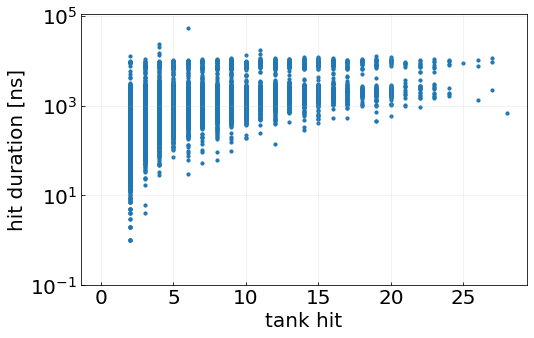

In [29]:
plotHitDuration(slcHit,slcHitDuration,prefix="SLCClean")

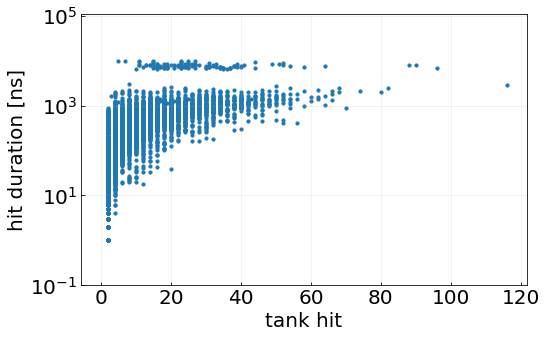

In [30]:
plotHitDuration(hlcHit,hlcHitDuration,prefix="HLCClean")

In [31]:
slcHit

array([0., 1., 0., ..., 6., 3., 3.])

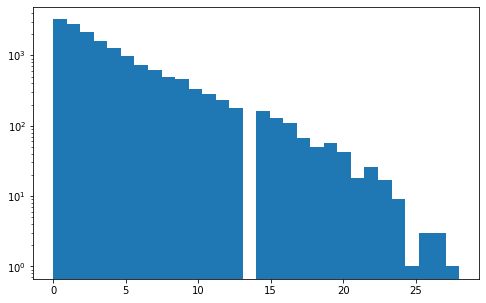

In [32]:
fig = plt.figure(figsize=(8,5))
gs = gridspec.GridSpec(ncols=1,nrows=1)
ax = fig.add_subplot(gs[0])
ax.hist(slcHit,30)
ax.set_yscale("log")
plt.show()

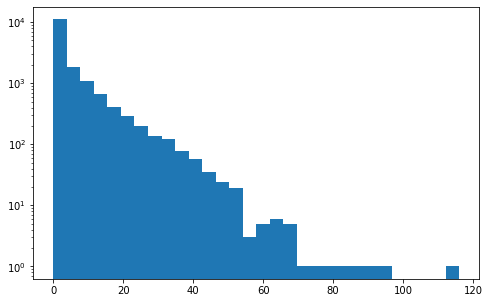

In [33]:
fig = plt.figure(figsize=(8,5))
gs = gridspec.GridSpec(ncols=1,nrows=1)
ax = fig.add_subplot(gs[0])
ax.hist(hlcHit,30)
ax.set_yscale("log")
plt.show()

In [34]:
hlcHit

array([2., 0., 4., ..., 0., 0., 2.])

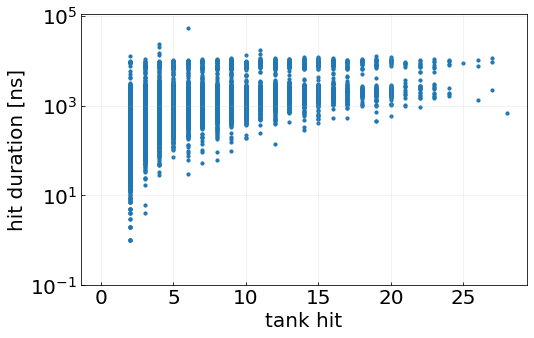

In [35]:
plotHitDuration(slcHit,slcHitDuration,prefix="SLC")

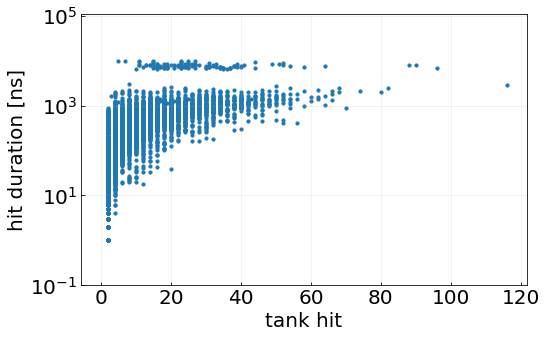

In [36]:
plotHitDuration(hlcHit,hlcHitDuration,prefix="HLC")

In [46]:
dataT = pd.read_hdf(hdf5NullList[0],key="OfflineIceTopHLCVEMPulsesCleanTimeCleanCharge")

In [47]:
dataT

,Run,Event,SubEvent,SubEventStream,exists,string,om,pmt,vector_index,time,width,charge
0,1,1100,0,0,1,38,61,0,0,500109.0,256.0,2.170350
1,1,1100,0,0,1,38,63,0,0,500129.0,256.0,0.673743
2,1,1102,0,0,1,36,61,0,0,500179.0,256.0,3.525024
3,1,1102,0,0,1,36,63,0,0,500163.0,256.0,1.534501
4,1,1102,0,0,1,79,61,0,0,500247.0,256.0,1.728510
...,...,...,...,...,...,...,...,...,...,...,...,...
42538,114,114109,0,0,1,50,63,0,0,561629.0,128.0,0.268141
42539,114,114109,0,0,1,79,61,0,0,563045.0,512.0,0.550883
42540,114,114109,0,0,1,79,63,0,0,562978.0,512.0,2.175602
42541,114,114109,0,0,1,80,61,0,0,562778.0,512.0,1.982754


In [ ]:
dataT["Event"].values

In [49]:
df = pd.read_hdf(hdf5NullList[1],key="OfflineIceTopHLCVEMPulsesCleanTimeCleanCharge_delta_t")

In [50]:
df

,Run,Event,SubEvent,SubEventStream,exists,vector_index,item
0,115,115100,0,0,1,0,34.0
1,115,115100,0,0,1,1,17.0
2,115,115100,0,0,1,2,5.0
3,115,115100,0,0,1,3,36.0
4,115,115100,0,0,1,4,8.0
...,...,...,...,...,...,...,...
16142,231,231104,0,0,1,0,27.0
16143,231,231104,0,0,1,1,13.0
16144,231,231104,0,0,1,2,57.0
16145,232,232103,0,0,1,0,27.0


In [51]:
df = pd.read_hdf(hdf5NullList[1],key="MCPrimary")

In [52]:
df

,Run,Event,SubEvent,SubEventStream,exists,x,y,z,time,zenith,azimuth,energy,speed,length,pdg_encoding,type,shape,location,fit_status
0,115,115100,0,0,1,686.154720,-1.113383,1950.08,396528.404956,0.392513,2.810981,25430136.0,0.299792,27393.207325,2212,2212,10,0,-1
1,115,115101,0,0,1,442.405075,-1392.552352,1950.08,396528.404956,0.392513,2.810981,25430136.0,0.299792,27393.207325,2212,2212,10,0,-1
2,115,115102,0,0,1,-1127.899841,-828.312052,1950.08,396528.404956,0.392513,2.810981,25430136.0,0.299792,27393.207325,2212,2212,10,0,-1
3,115,115103,0,0,1,646.525543,-277.510635,1950.08,396528.404956,0.392513,2.810981,25430136.0,0.299792,27393.207325,2212,2212,10,0,-1
4,115,115104,0,0,1,-305.479458,-1548.291622,1950.08,396528.404956,0.392513,2.810981,25430136.0,0.299792,27393.207325,2212,2212,10,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015,232,232105,0,0,1,607.643740,-914.099322,1950.08,823614.743591,1.126352,4.632796,13839633.0,0.299792,63087.082503,2212,2212,10,0,-1
8016,232,232106,0,0,1,-1393.367471,349.444897,1950.08,823614.743591,1.126352,4.632796,13839633.0,0.299792,63087.082503,2212,2212,10,0,-1
8017,232,232107,0,0,1,-577.150806,322.804375,1950.08,823614.743591,1.126352,4.632796,13839633.0,0.299792,63087.082503,2212,2212,10,0,-1
8018,232,232108,0,0,1,-79.553887,1178.776798,1950.08,823614.743591,1.126352,4.632796,13839633.0,0.299792,63087.082503,2212,2212,10,0,-1


In [53]:
df["zenith"].values

array([0.39251336, 0.39251336, 0.39251336, ..., 1.12635219, 1.12635219,
       1.12635219])

In [ ]:
len(set(dataT["Event"].values))

In [54]:
A = np.linspace(1,50,1000)

In [55]:
A

array([ 1.        ,  1.04904905,  1.0980981 ,  1.14714715,  1.1961962 ,
        1.24524525,  1.29429429,  1.34334334,  1.39239239,  1.44144144,
        1.49049049,  1.53953954,  1.58858859,  1.63763764,  1.68668669,
        1.73573574,  1.78478478,  1.83383383,  1.88288288,  1.93193193,
        1.98098098,  2.03003003,  2.07907908,  2.12812813,  2.17717718,
        2.22622623,  2.27527528,  2.32432432,  2.37337337,  2.42242242,
        2.47147147,  2.52052052,  2.56956957,  2.61861862,  2.66766767,
        2.71671672,  2.76576577,  2.81481481,  2.86386386,  2.91291291,
        2.96196196,  3.01101101,  3.06006006,  3.10910911,  3.15815816,
        3.20720721,  3.25625626,  3.30530531,  3.35435435,  3.4034034 ,
        3.45245245,  3.5015015 ,  3.55055055,  3.5995996 ,  3.64864865,
        3.6976977 ,  3.74674675,  3.7957958 ,  3.84484484,  3.89389389,
        3.94294294,  3.99199199,  4.04104104,  4.09009009,  4.13913914,
        4.18818819,  4.23723724,  4.28628629,  4.33533534,  4.38

In [56]:
B = np.linspace(1,50000,1000)

In [57]:
B

array([1.00000000e+00, 5.10490490e+01, 1.01098098e+02, 1.51147147e+02,
       2.01196196e+02, 2.51245245e+02, 3.01294294e+02, 3.51343343e+02,
       4.01392392e+02, 4.51441441e+02, 5.01490490e+02, 5.51539540e+02,
       6.01588589e+02, 6.51637638e+02, 7.01686687e+02, 7.51735736e+02,
       8.01784785e+02, 8.51833834e+02, 9.01882883e+02, 9.51931932e+02,
       1.00198098e+03, 1.05203003e+03, 1.10207908e+03, 1.15212813e+03,
       1.20217718e+03, 1.25222623e+03, 1.30227528e+03, 1.35232432e+03,
       1.40237337e+03, 1.45242242e+03, 1.50247147e+03, 1.55252052e+03,
       1.60256957e+03, 1.65261862e+03, 1.70266767e+03, 1.75271672e+03,
       1.80276577e+03, 1.85281481e+03, 1.90286386e+03, 1.95291291e+03,
       2.00296196e+03, 2.05301101e+03, 2.10306006e+03, 2.15310911e+03,
       2.20315816e+03, 2.25320721e+03, 2.30325626e+03, 2.35330531e+03,
       2.40335435e+03, 2.45340340e+03, 2.50345245e+03, 2.55350150e+03,
       2.60355055e+03, 2.65359960e+03, 2.70364865e+03, 2.75369770e+03,
      

In [63]:
df = pd.DataFrame({'A': A, 'B': B}, columns=['A', 'B'])

In [78]:
df

,A,B
0,1.000000,1.000000
1,1.049049,51.049049
2,1.098098,101.098098
3,1.147147,151.147147
4,1.196196,201.196196
...,...,...
995,49.803804,49799.803804
996,49.852853,49849.852853
997,49.901902,49899.901902
998,49.950951,49949.950951


In [80]:
df["bins"] = pd.cut(df["A"],bins=[0,10,20,30,40,50])

In [81]:
df

,A,B,bins
0,1.000000,1.000000,"(0, 10]"
1,1.049049,51.049049,"(0, 10]"
2,1.098098,101.098098,"(0, 10]"
3,1.147147,151.147147,"(0, 10]"
4,1.196196,201.196196,"(0, 10]"
...,...,...,...
995,49.803804,49799.803804,"(40, 50]"
996,49.852853,49849.852853,"(40, 50]"
997,49.901902,49899.901902,"(40, 50]"
998,49.950951,49949.950951,"(40, 50]"


In [85]:
df.groupby("bins").bin.count()

AttributeError: 'DataFrameGroupBy' object has no attribute 'bin'

In [87]:
df2 = df.groupby('bins').count()

In [88]:
df2

,A,B
bins,,
"(0, 10]",184,184
"(10, 20]",204,204
"(20, 30]",204,204
"(30, 40]",204,204
"(40, 50]",204,204


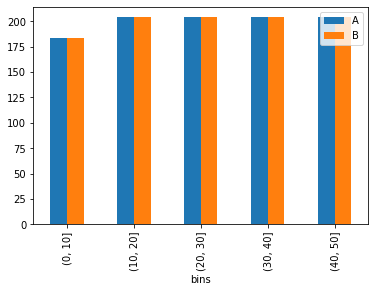

In [89]:
df2.plot(kind='bar')

In [ ]:
HLCEvents = list(set(dataT["Event"].values))

In [ ]:
def HLCTimes(df,event,station):
    timeList = []
    for index,rows in df.iterrows():        
        if rows["Event"] == event and rows["string"] == station:
            timeList.append(rows["time"])
    if len(timeList) > 2:
        print("there can be a problem in ",event,station)
    return abs(timeList[1]-timeList[0])
            
    

In [44]:
def getHitStations(df,event):
    hitStations = []
    for index,rows in df.iterrows():        
        if rows["Event"] == event:
            hitStations.append(rows["string"])
    hitStations = list(set(hitStations))
    return hitStations

In [45]:
delta_t_list = []
for ievent in HLCEvents:
    hitStations = getHitStations(dataT,ievent)
    for istation in hitStations:
            delta_t = HLCTimes(dataT,ievent,istation)
            delta_t_list.append(delta_t)
print(len(delta_t_list))

there can be a problem in  109103 19.0


KeyboardInterrupt: 

In [ ]:
def plotHist(delta_t,suffix=""):
#     delta_t = np.log10(delta_t)
    fig = plt.figure(figsize=(8,5))
    gs = gridspec.GridSpec(ncols=1,nrows=1)
    ax = fig.add_subplot(gs[0])
    hitBins = np.linspace(min(delta_t),max(delta_t),600)
    ax.hist(delta_t,bins=hitBins,histtype="step",lw=2.5,alpha=1)
    ax.tick_params(axis='both',which='both', direction='in', labelsize=20)
    ax.set_xlabel(r"$\Delta_{t}$ [ns]", fontsize=20)
    ax.set_ylabel(r"count", fontsize=20)
    ax.set_yscale('log')
    ax.set_xlim(-10,1000)
    ax.grid(True,alpha=0.2)
#     ax.set_title(key,fontsize=16)
    # ax.legend(fontsize=20)
    plt.savefig(plotFolder+"/"+str(suffix)+"delta_t.pdf",transparent=False,bbox_inches='tight')
    plt.show()
#     plt.close()


In [ ]:
plotHist(delta_t_list,"")

In [ ]:
# for ievent in HLCEvents:
#     for index,rows in dataT.iterrows():
#         stations = []
#         if rows["Event"] == ievent:
#             stations.append(rows["string"])

            

In [ ]:
# dataT["string"].values

In [ ]:
# set(dataT["string"].values)

In [ ]:
dataT = pd.read_hdf(hdf5NullList[0],key="OfflineIceTopHLCTankPulsesTotalHit")

In [ ]:
dataT

In [ ]:
if not True:
    print("Hi")

In [ ]:
if not False:
    print("Hi")

In [ ]:
# timeList